<a href="https://colab.research.google.com/github/BruDiGe/tutorial-MD/blob/main/MD_tutorial_biocatcode_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Molecular dyamics simulations workshop

Second session

Thursday 5th December 2024 (14:20-15:50)

# Introduction to Funnel Metadynamics Simulations with AMBER and PLUMED

- **Author:** Bruno Di Geronimo  
- **Contact:** bgeronimo3@gatech.edu  
- **GitHub:** [https://github.com/BruDiGe/tutorial-MD.git](https://github.com/BruDiGe/tutorial-MD.git)  

---

## Useful Links:
1. [AMBER](https://ambermd.org/index.php)
2. [PLUMED](https://www.plumed.org/doc-master/user-doc/html/index.html)
3. [Metadynamics](https://www.plumed.org/doc-master/user-doc/html/_m_e_t_a_d.html)
4. [Funnel-maker](https://github.com/dlukauskis/funnel_maker/blob/main/funnel_maker_tutorial.ipynb)

---

## References

1. [Article 1](https://pubs.acs.org/doi/10.1021/acs.jcim.6b00772)  
2. [Article 2](https://pubs.acs.org/doi/10.1021/acs.jctc.0c00075)  
3. [Article 3](https://pubs.acs.org/doi/10.1021/acs.jmedchem.4c00204)

---

## Index of Actions:

### 1. Install AmberTools & ParmEd Using CONDA
Step-by-step guide to set up **AmberTools** and **ParmEd** with the Conda package manager.

---

### 2. Brief Introduction to Funnel Metadynamics
Overview of the **Funnel Metadynamics** method, its goals, and applications in molecular dynamics simulations.

---

### 3. Metadynamics Simulation Visualization
Download the following files from [this link](https://github.com/BruDiGe/tutorial-MD/tree/main/03_metadynamics):

1. **HOLO:** `6GGI-A-GSS_equi.pdb`  
2. **Trajectory:** `6GGI-A-GSS_metad.dcd`

Use **PyMOL** or **VMD** to visualize the trajectory.

---

### 4. Free Energy Surface Analysis
Using **PLUMED**, we will:
- Obtain the corresponding **Free Energy Surface (FES)** from the metadynamics simulation.
- Analyze the results with **cpptraj**.

---

### 5. Discussion and Conclusions
Summarize insights, highlight key findings, and discuss the implications of Funnel Metadynamics simulations.

# 1. Instal Ambertools & parmed using CONDA

The `pip` command is the Python package installer. It is used to install, manage, and update Python packages from the Python Package Index (**PyPI**) and other repositories.


In [ ]:
!pip install -q condacolab

In [ ]:
import condacolab
condacolab.install()

The `conda` command is a versatile tool for managing packages, dependencies, and environments in Python (and other languages). It is part of the Conda package management system, commonly associated with the **Anaconda** and **Miniconda** distributions.

In [ ]:
!conda --version

In [ ]:
!conda create --name AmberTools23

In [ ]:
!source activate base

In [ ]:
!conda install -c conda-forge ambertools=23

In [ ]:
!source activate AmberTools23

In [ ]:
!which cpptraj

In [ ]:
!which tleap

In [ ]:
!pip install parmed

In [ ]:
!which parmed

# 2. Brief introduction about what is Funnel Metadynamics

**Funnel Metadynamics** is a specialized variation of the metadynamics method used in molecular dynamics (MD) simulations. It is designed to calculate free energy landscapes for binding events, such as ligand binding to a receptor, while significantly enhancing the sampling efficiency and reducing computational costs.

---

### Key Concept
In traditional metadynamics, a bias potential is added to accelerate sampling along selected **collective variables (CVs)**, but for ligand-binding studies, sampling the entire 3D space of the ligand around the receptor can be computationally expensive.  


Funnel metadynamics solves this problem by restricting the exploration space for the ligand to a funnel-shaped region around the binding site, thereby focusing the sampling and reducing unnecessary exploration of irrelevant areas.

---

### How It Works
Funnel Shaped Restriction:

A funnel-like restraint is applied to the ligand's position relative to the receptor.
The funnel is narrow near the binding site and widens as you move away, mimicking the realistic space a ligand would explore near its target.

---

### Collective Variables (CVs):

Distance: Between the ligand and the binding site: pp.proj and pp.ext

![Figure 1](https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/03_metadynamics/figure1.jpeg)



### Plumed File

Take a look at the `plumed.dat` file to understand the following components:

1. **Collective Variables (CVs):**
   - `pp.ext`: The CV for extension.
   - `pp.prj`: The CV for projection.

2. **UPPER_LIMITS:**
   - Inspect how the upper limits are defined for the CVs to control the sampling region.

3. **Metadynamics Input and Output:**
   - Understand how the metadynamics biasing is implemented in the input file.
   - Review the output `HILLS` file, which records the deposited bias over time.





In [ ]:
!curl -O https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/03_metadynamics/plumed.dat
!cat plumed.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3037  100  3037    0     0   9069      0 --:--:-- --:--:-- --:--:--  9092
####################################
#plumed.dat for Funnel Metadynamics#
# Written on 2024-11-13 15:52:36.654153
# By funnel_maker 1.0
####################################
RESTART

###############################################
###DEFINE RADIUS + CALC PROT-LIG VECTOR COMP###
###############################################

WHOLEMOLECULES STRIDE=1 ENTITY0=1-4730 ENTITY1=4731-4792

########################
###DEFINITION_OF_COMs###
########################
lig: COM ATOMS=4731-4792
p0: COM ATOMS=1134,1145,3186,4216,4232,4252,4271,4283,4302
p1: COM ATOMS=1015,1059,1438,1479,1493,1553,2606,2660,2672,2691,2698,2746,3245,3264,3313,3327,4349


########################
###DEFINITION_OF_ARGs###
########################
# CV1: pp.proj = projection on the axis. Th

# 3. Metadynamics Simulation Visualization

To visualize the constructed funnel, download the file [funnel.pse](https://github.com/BruDiGe/tutorial-MD/blob/main/03_metadynamics/funnel.pse) and open it in **PyMOL** using:  
**File > Open ...**

This file will allow you to observe:
- The **CV projection** on the axis.
- The **CV extension** on the axis.
- The defined **UPPER_WALLS**.

---

### Download Simulation Files

Download the following files from [this link](https://github.com/BruDiGe/tutorial-MD/tree/main/03_metadynamics):

1. **HOLO System:** `6GGI-A-GSS_equi.pdb`
2. **Trajectory File:** `6GGI-A-GSS_metad.dcd`

---

### Steps to Visualize in PyMOL

1. Open **PyMOL** and change the working directory to the location where you downloaded the files:  
   **File > Working Directory > Change ...**

2. Use the following commands in PyMOL's Console to load the trajectory:
   ```bash
   load 6GGI-A-GSS_equi.pdb, metad
   load_traj 6GGI-A-GSS_metad.dcd, metad



### Observing the Exit of Substrate GSA from the Active Site

Take a close look at the exit of the substrate **GSA** from the active site. Analyze the following:

1. **Key Interactions**:  
   - Identify the interactions that are relevant during the process, such as:
     - Hydrogen bonds.
     - Electrostatic interactions.
     - Hydrophobic contacts.
   - Observe how these interactions change as the substrate exits the active site.

2. **Overall Process**:  
   - Understand the dynamics of the entire process and how the substrate interacts with the protein during its journey out of the active site.

3. **Order of Exit**:  
   - Determine which part of **GSA** exits the active site first:
     - Is it the **hydrophobic moiety** or the **hydrophilic moiety**?  
   - Consider the nature of the active site environment and how it influences the direction of substrate egress.

---

### Questions for Discussion:
- What role do hydrophobic and hydrophilic interactions play in stabilizing or destabilizing **GSA** during its exit?
- How do protein flexibility and solvent interactions contribute to the substrate's pathway?

# 4. Free Energy Surface analysis

We install first the colab-sh!

In [ ]:
!pip install colab-ssh
!which vim
!ls

Download fes.dat!

The **fes.dat** file in PLUMED contains the free energy surface **(FES)** computed during a simulation, typically as a function of one or more collective variables **(CVs)**. This file provides a tabulated representation of the free energy values corresponding to the sampled configurations of the system. **fes.dat** file is generated by  by reweighting the information stored in the **HILLS** file.

---

### Free Energy Reconstruction in Metadynamics

The **free energy surface (FES)** is reconstructed from the bias potential added during the simulation **(HILLS)**. The free energy as a function of the collective variable (\(s\)) is given by:

$$
F(s) = -\frac{1}{\beta} \ln P(s) + C
$$

Where:
- $s$: The collective variable (CV).
- $P(s)$: The probability of sampling $s$, which is enhanced by the bias potential.
- $\beta = \frac{1}{k_B T}$: The inverse thermal energy, where:
  - $k_B$: Boltzmann constant.
  - $T$: Absolute temperature of the system (in Kelvin).
- $C$: An arbitrary constant added to ensure the minimum free energy is zero.

---

### Example of Free Energy Surface

The following image illustrates a free energy surface (FES) from metadynamics:

<img src="https://pubs.acs.org/cms/10.1021/acs.jctc.4c00091/asset/images/medium/ct4c00091_0006.gif" alt="Free Energy Surface" />


---

#### Explanation:
- The **probability distribution** $P(s)$ is derived from the biased sampling and is related to the frequency with which the system visits specific values of the CV.
- The **bias potential** is designed to flatten the free energy barriers along the CV, allowing efficient sampling of high-energy states.
- The resulting free energy surface provides insights into the thermodynamics and kinetics of the system being studied, such as ligand binding or conformational changes.

---

#### Notes:
- In PLUMED, the `fes.dat` file contains the reconstructed free energy as a function of the CV(s).
- FES units are typically in kcal/mol or kJ/mol, depending on the simulation parameters. kJ/mol in this case.



References:
  * [Article 1](https://www.plumed.org/doc-v2.9/user-doc/html/sum_hills.html)
  * [Article 2](https://pubs.acs.org/doi/full/10.1021/acs.jctc.4c00091)


In [4]:
!curl -o fes.dat https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/03_metadynamics/fes.dat
!curl -o HILLS https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/03_metadynamics/HILLS
!ls -lrth

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2558k  100 2558k    0     0  8699k      0 --:--:-- --:--:-- --:--:-- 8731k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.8M  100 11.8M    0     0  33.0M      0 --:--:-- --:--:-- --:--:-- 33.0M
total 15M
drwxr-xr-x 1 root root 4.0K Nov 25 19:13 sample_data
-rw-r--r-- 1 root root 2.5M Dec  2 00:57 fes.dat
-rw-r--r-- 1 root root  12M Dec  2 00:57 HILLS


We can simple take a look to **fes.dat**. & **HILLS** files using <span style="background-color: lightgrey;">head</span> command.

**HILLS** file contains the information: time, pp.proj (CV1), pp.ext (CV2), sigma_pp.proj sigma_pp.ext height (height of each HILL added) and biasf (well tempered metadynamics).

In [5]:
!head HILLS

#! FIELDS time pp.proj pp.ext sigma_pp.proj sigma_pp.ext height biasf
#! SET multivariate false
#! SET kerneltype stretched-gaussian
                      4       1.44724576221284     0.1109083226388341                  0.025                   0.03      2.051282051282051                     40
                      8      1.483087496247496     0.1095999330691624                  0.025                   0.03      2.036319228414616                     40
                     12      1.478635776083295     0.1064962961410231                  0.025                   0.03      1.992344207016422                     40
                     16      1.455501604338705      0.102208399210751                  0.025                   0.03      1.966717788181912                     40
                     20      1.499777001440515     0.1136291011311759                  0.025                   0.03       1.97924195456896                     40
                     24      1.459733903670871     0.1284

**fes.dat** contains the information: pp.proj (CV1), pp.ext (CV2), file.free (Free Energy) and der_pp.proj der_pp.ext (not related).

In [ ]:
!head -n 15 fes.dat

#! FIELDS pp.proj pp.ext file.free der_pp.proj der_pp.ext
#! SET min_pp.proj 0.900347
#! SET max_pp.proj 4.11232
#! SET nbins_pp.proj  365
#! SET periodic_pp.proj false
#! SET min_pp.ext -0.105946
#! SET max_pp.ext 0.92586
#! SET nbins_pp.ext  99
#! SET periodic_pp.ext false
    0.900347000   -0.105946000  218.160732925   -0.000000000   -0.000000000
    0.909171102   -0.105946000  218.160732925   -0.000000000   -0.000000000
    0.917995203   -0.105946000  218.160732925   -0.000000000   -0.000000000
    0.926819305   -0.105946000  218.160732925   -0.000000000   -0.000000000
    0.935643407   -0.105946000  218.160732925   -0.000000000   -0.000000000
    0.944467508   -0.105946000  218.160732925   -0.000000000   -0.000000000


### PLOT HILLS and FES files

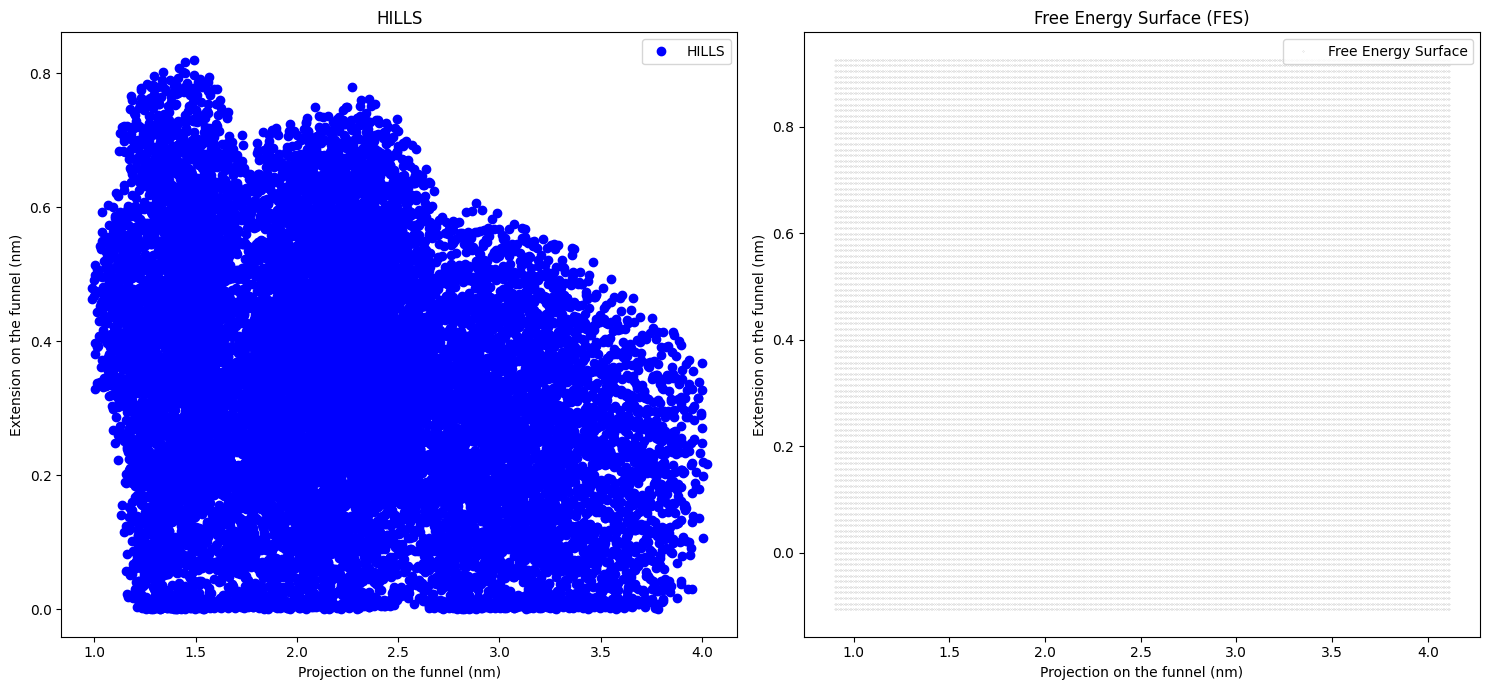

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded files
file_hills = 'HILLS'
file_fes = 'fes.dat'

# Load the data from the files
data_hills = np.loadtxt(file_hills, skiprows=3)
data_fes = np.loadtxt(file_fes, skiprows=9)

# Extract proj (x-axis) and ext values (y-axis)
proj_hills = data_hills[:, 1]
ext_hills = data_hills[:, 2]

proj_fes = data_fes[:, 0]
ext_fes = data_fes[:, 1]

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot the HILLS on the left subplot
axes[0].plot(proj_hills, ext_hills, label='HILLS', color='blue', marker='o', linewidth=4, linestyle='')
axes[0].set_xlabel('Projection on the funnel (nm)')
axes[0].set_ylabel('Extension on the funnel (nm)')
axes[0].set_title('HILLS')
axes[0].legend()

# Plot the FES on the right subplot
axes[1].plot(proj_fes, ext_fes, label='Free Energy Surface', marker='.', color='grey', markersize=0.2, linestyle='')
axes[1].set_xlabel('Projection on the funnel (nm)')
axes[1].set_ylabel('Extension on the funnel (nm)')
axes[1].set_title('Free Energy Surface (FES)')
axes[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

! Don't worry. Blue dots show where GSA molecule was exploring along the metadynamics, meanwhile FES show the integration along the entire surface, therefore we need a 3D plot!

### 3D PLOT including Energies

<ipython-input-6-ce44788be898>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(data_file, delim_whitespace=True, header=None, skip_blank_lines=True, skiprows=9)


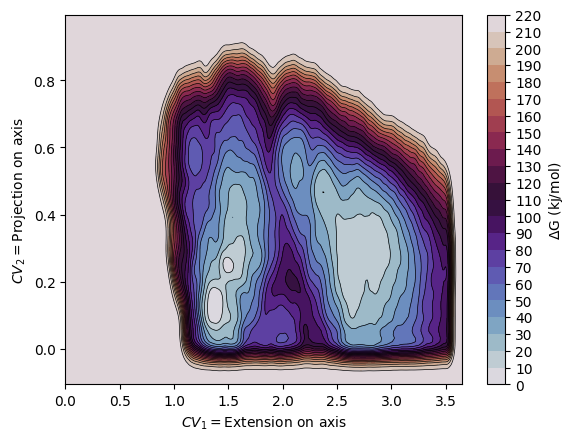

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

# Variables ===================================================================
#### Delete header lines from fes.dat
data_file = 'fes.dat'
figure_size = [12, 9]
dpi = 500

# Load Data ===================================================================
data = pd.read_csv(data_file, delim_whitespace=True, header=None, skip_blank_lines=True, skiprows=9)

x = (np.unique(data.iloc[:, 0]))
y = (np.unique(data.iloc[:, 1]))
z = np.asarray(data.iloc[:, 2]).reshape(len(y), len(x))

min_value = np.min(z)
max_value = np.max(z)

# Create figure ===============================================================
fig, ax = plt.subplots()
# Ensure X includes 0 and pad data for Z
if 0 not in x:
    x = np.insert(x, 0, 0)
    z_zero = z[:, 0]  # You can interpolate or use the first column as a proxy
    z = np.column_stack([z_zero, z])


bounds = np.arange(min_value, max_value + 10, 10)

# You can choose from various color palettes.==================================
# cmap = "viridis", "coolwarm", "YnBu", "magma", "RdYlBu_r", "Blues"

level_lines = ax.contourf(x, y, z, cmap='twilight', levels=bounds)  # Contour plot
ax.contour(x, y, z, colors='black', levels=bounds, linestyles='solid', linewidths=0.5)   # Black level lines

cbar= plt.colorbar(level_lines, ax=ax, ticks=bounds)

cbar.set_label('$\Delta$G (kj/mol)')

ax.set_xlim(left=0)  # Sets the lower limit of x-axis to 0


ax.set_xlabel(r'$CV_1 = \mathrm{Extension\ on\ axis}$')
ax.set_ylabel(r'$CV_2 = \mathrm{Projection\ on\ axis}$')
plt.show()

Identify the three corresponding minima.

### GSA analysis

Download files:
* GSA.rmsd
* 6GGI-A-GSA_loop.rmsd
* lie-GSA.dat

In [7]:
!curl -o GSA.rmsd https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/03_metadynamics/GSA.rmsd
!curl -o 6GGI-A-GSA_loop.rmsd https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/03_metadynamics/6GGI-A-GSA_loop.rmsd
!curl -o lie-GSA.dat https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/03_metadynamics/lie-GSA.dat
!ls -lrth

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  644k  100  644k    0     0  2081k      0 --:--:-- --:--:-- --:--:-- 2079k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  732k  100  732k    0     0  2573k      0 --:--:-- --:--:-- --:--:-- 2579k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  102k  100  102k    0     0   407k      0 --:--:-- --:--:-- --:--:--  408k
total 16M
drwxr-xr-x 1 root root 4.0K Nov 25 19:13 sample_data
-rw-r--r-- 1 root root 2.5M Dec  2 00:57 fes.dat
-rw-r--r-- 1 root root  12M Dec  2 00:57 HILLS
-rw-r--r-- 1 root root 645K Dec  2 00:59 GSA.rmsd
-rw-r--r-- 1 root root 733K Dec  2 00:59 6GGI-A-GSA_loop.rmsd
-rw-r--r-- 1 root 

### PLOT GSA and N-TERMINAL loop RMSD & LIE

<ipython-input-12-13c92872ed09>:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True)


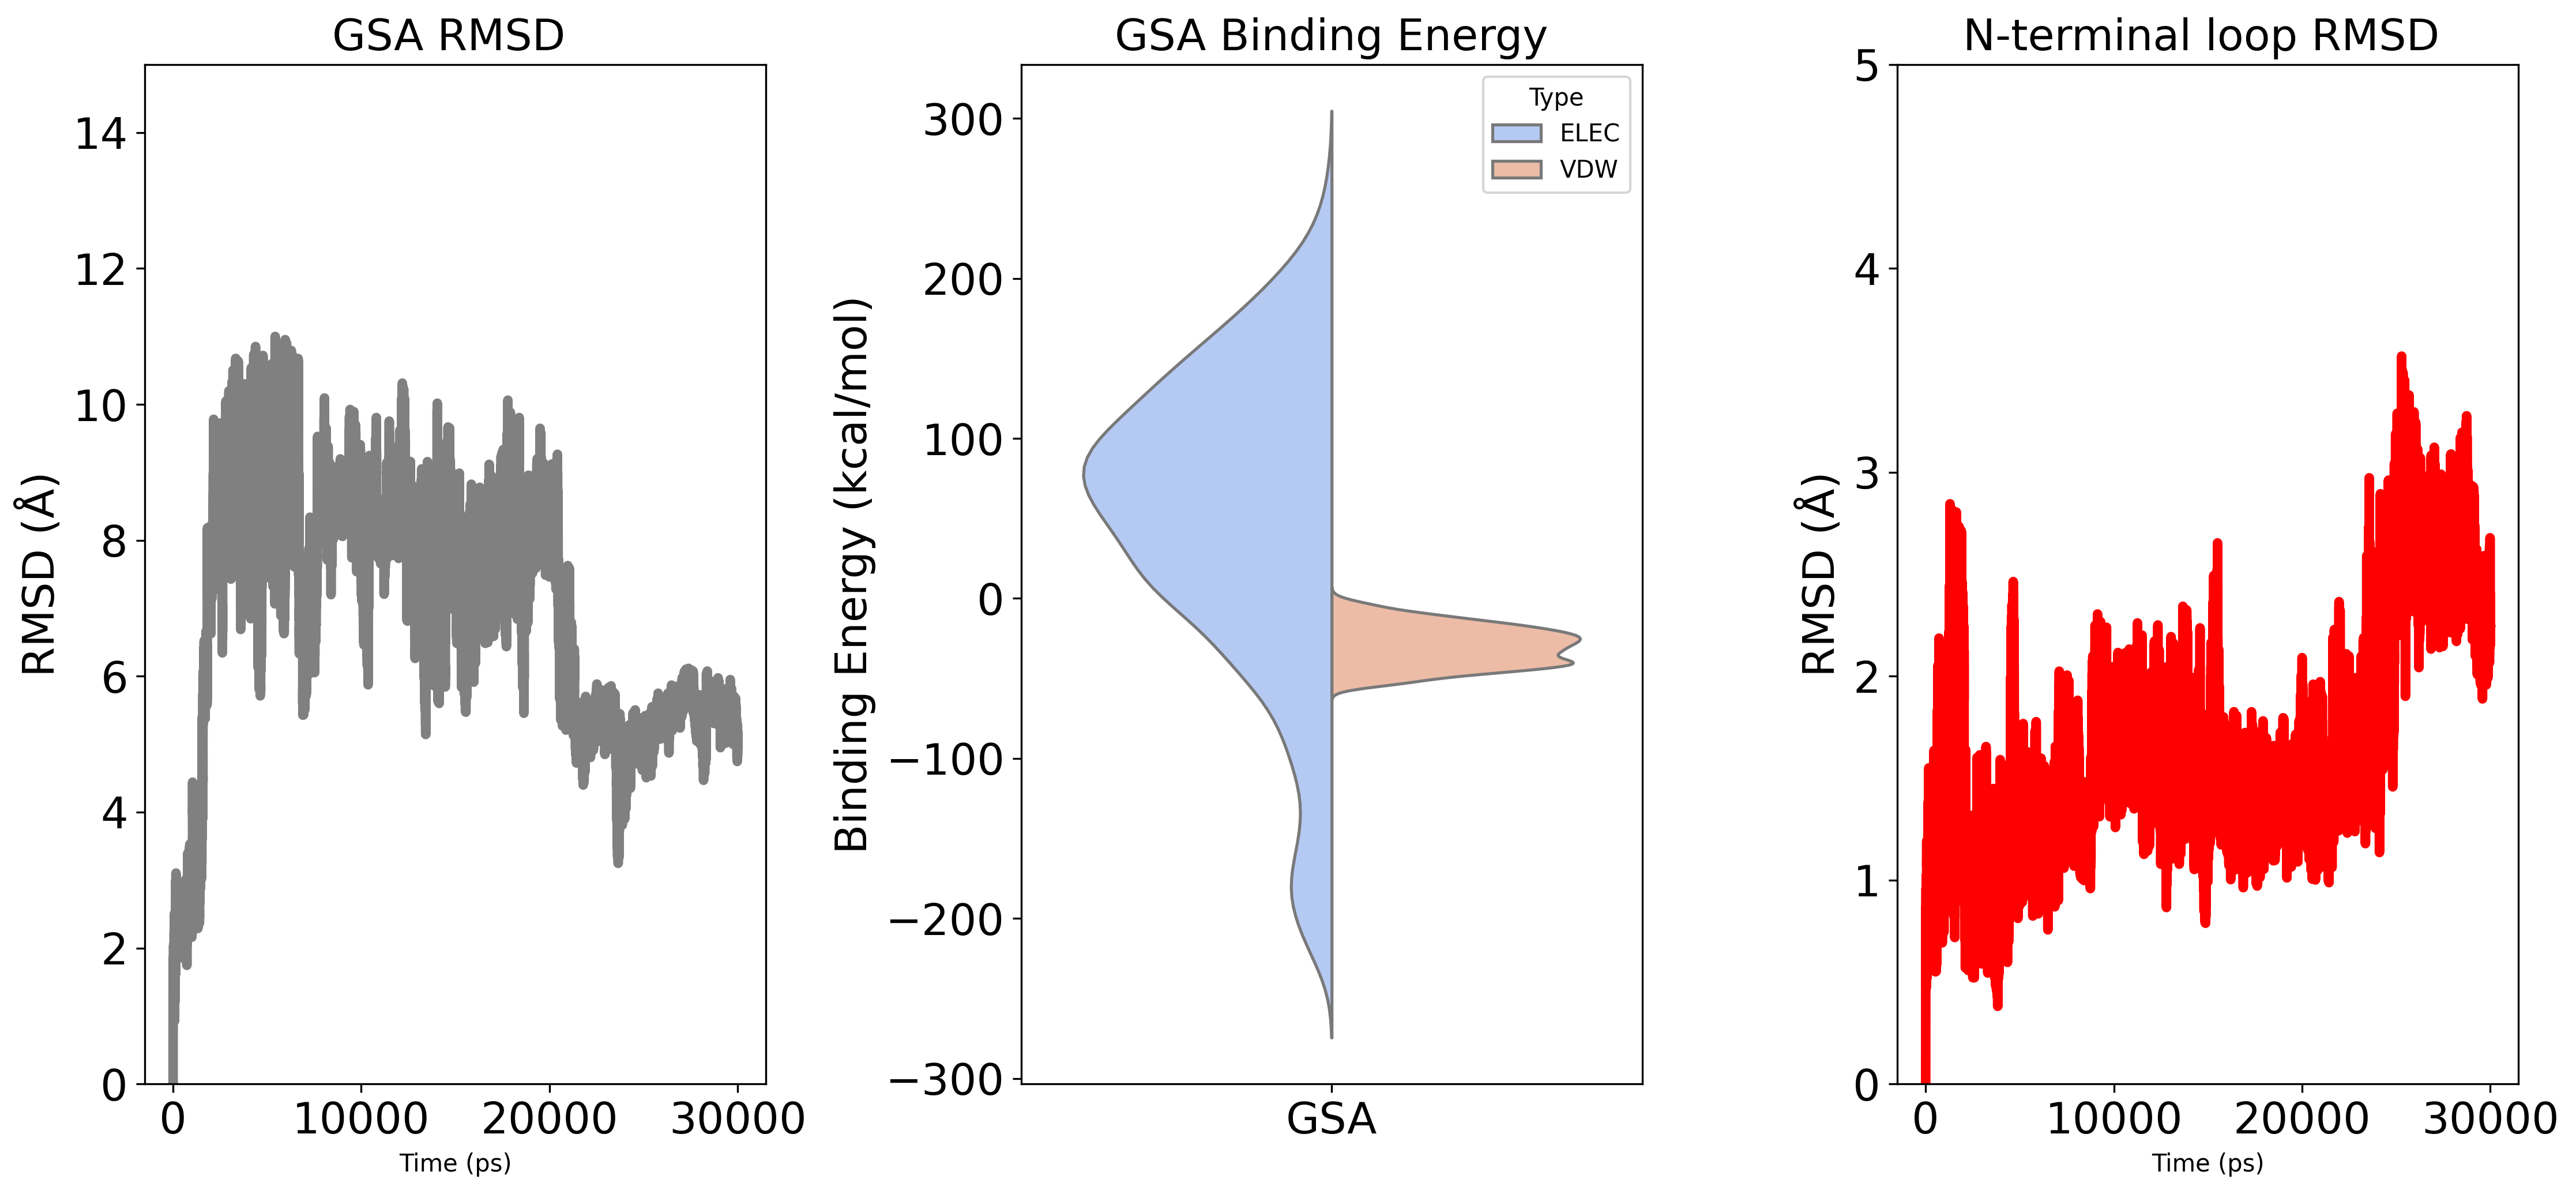

In [12]:
### First we modify lie-GSA.dat file to plot the violin accordingly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load the data
file_path = 'lie-GSA.dat'  # Replace with your file path
data = pd.read_csv(file_path, delim_whitespace=True)

# Transform data to long format
long_format_data = pd.melt(
    data,
    id_vars=['#Frame'],
    value_vars=['GSA[EELEC]', 'GSA[EVDW]'],
    var_name='Type',
    value_name='Value'
)

# Replace GSA[EELEC] and GSA[EVDW] with ELEC and VDW in the 'Type' column
long_format_data['Type'] = long_format_data['Type'].replace({'GSA[EELEC]': 'ELEC', 'GSA[EVDW]': 'VDW'})

# Modify the first column to contain only the string "GSA"
long_format_data['#Frame'] = 'GSA'

# Save the transformed data to a new file
output_file_path = 'lie.csv'
long_format_data.to_csv(output_file_path, index=False)

output_file_path

#### Ploting options
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
rmsd_file_path = 'GSA.rmsd'
rmsd_loop_path = '6GGI-A-GSA_loop.rmsd'
lie_file_path = 'lie.csv'

# Load GSA.rmsd data
data_gsa = np.loadtxt(rmsd_file_path, skiprows=1)  # Assuming data starts from second line
data_loop = np.loadtxt(rmsd_loop_path, skiprows=1)

# Extract time (x-axis) and RMSD values (y-axis)
time_gsa = data_gsa[:, 0]  # Assuming time is in the first column
rmsd_gsa = data_gsa[:, 1]  # Assuming RMSD values are in the second column

time_loop = data_loop[:, 0]  # Assuming time is in the first column
rmsd_loop = data_loop[:, 1]  # Assuming RMSD values are in the second column

# Load lie.csv data
lie_data = pd.read_csv(lie_file_path)
lie_data.columns = ['System', 'Type', 'Value']  # Ensure column names match

# Convert Value column to float
lie_data['Value'] = lie_data['Value'].astype(float)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 7), dpi=300)

# Font size customization
font_size_ticks = 18
font_size_labels = 18

# Plot RMSD data on the left
axs[0].plot(time_gsa, rmsd_gsa, linewidth=4, label='RMSD', color='grey')
axs[0].set_xlabel('Time (ps)')
axs[0].set_ylabel('RMSD (Å)', fontsize=font_size_labels)
axs[0].set_title('GSA RMSD ', fontsize=font_size_labels)
axs[0].tick_params(axis='both', which='major', labelsize=font_size_ticks)
axs[0].set_ylim(0, 15)

# Plot violin plot on the midle
sns.violinplot(
    data=lie_data, y='Value', x='System', hue='Type', split=True, inner=None, palette='coolwarm', ax=axs[1]
)
axs[1].set_ylabel('Binding Energy (kcal/mol)', fontsize=font_size_labels)
axs[1].set_xlabel('')
axs[1].set_title('GSA Binding Energy', fontsize=font_size_labels)
axs[1].tick_params(axis='both', which='major', labelsize=font_size_ticks)


# Plot RMSD data on the right
axs[2].plot(time_loop, rmsd_loop, linewidth=4, label='RMSD', color='red')
axs[2].set_xlabel('Time (ps)')
axs[2].set_ylabel('RMSD (Å)', fontsize=font_size_labels)
axs[2].set_title('N-terminal loop RMSD ', fontsize=font_size_labels)
axs[2].tick_params(axis='both', which='major', labelsize=font_size_ticks)
axs[2].set_ylim(0, 5)

# Adjust layout
plt.tight_layout()

# Save the plot
output_plot_path = 'rmsd_violin_plots.png'
plt.savefig(output_plot_path, bbox_inches='tight')
plt.show()

# 5. Discussion and conclusions

Funnel-ligand metadynamics is a highly efficient technique for studying ligand binding and unbinding processes. By confining sampling to a funnel-shaped region, it reduces computational costs and ensures focused exploration of the binding site. Key observations include:

1. **Efficient Sampling**:  
   The funnel-shaped restraint directs sampling to relevant pathways, improving convergence and minimizing exploration of irrelevant areas.

2. **Binding and Unbinding Mechanisms**:  
   This approach provides detailed insights into the ligand's pathway, capturing key interactions (e.g., hydrogen bonds, electrostatic, and hydrophobic contacts) that govern binding dynamics.

3. **Free Energy Surface (FES)**:  
   The reconstructed FES reveals the thermodynamics of ligand binding, including stable poses and intermediate states, aiding in understanding binding energetics.

4. **Role of Collective Variables (CVs)**:  
   Properly chosen CVs and funnel parameters are critical for accurate results. Upper walls ensure efficient and focused sampling.

---

### **Conclusions**
1. **Ligand Binding Energetics**:  
   Funnel metadynamics enables precise calculation of ligand binding free energies $\Delta G_{\text{bind}}$ and identification of key binding interactions.

2. **Mechanistic Insights**:  
   It captures detailed binding/unbinding mechanisms, highlighting critical residues and solvent effects.

3. **Limitations**:  
   Results depend on the accuracy of the force field and CVs, as well as convergence of the simulation.
